In [174]:
# imports
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
## question 1

In [2]:
#Data_set paths
path_to_housing_prices = './data_assignment2.csv'

In [3]:
df = pd.read_csv(path_to_housing_prices)

In [4]:
# remove rendundant columns
df = df.iloc[:, [1,-1]]

In [5]:
df_raw = df.dropna().reset_index()
df_cleaned = df_raw.copy()

In [6]:
x = np.array(df_raw['Living_area']).reshape(-1,1)
y = np.array(df_raw['Selling_price'])

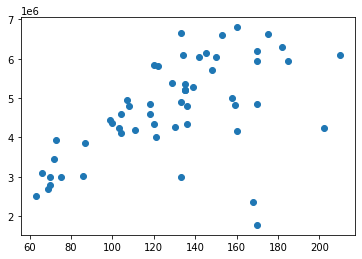

In [7]:
plt.scatter(x,y)
plt.show()

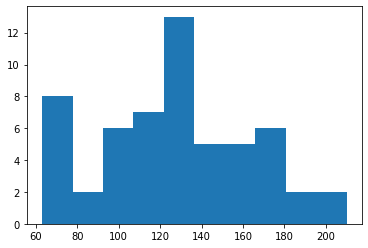

In [8]:
plt.hist(x)
plt.show()

In [9]:
#Generating a linear regression model, which is a line in this case
model = LinearRegression().fit(x, y)

In [10]:
model.coef_

array([19370.13854733])

In [11]:
model.intercept_

2220603.243355869

In [12]:
model.predict([[100],[150],[200]])

array([4157617.09808903, 5126124.02545561, 6094630.95282218])

In [14]:
df_raw['predicted_Selling_price'] = model.predict(x).tolist()

In [15]:
df_raw['e'] = df_raw['Selling_price'] - df_raw['predicted_Selling_price']

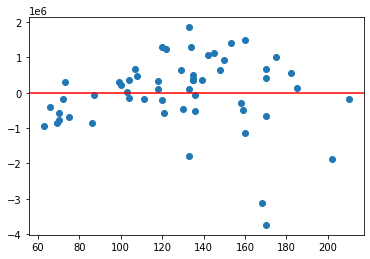

In [16]:
plt.scatter(df_raw['Living_area'], df_raw['e'])
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [17]:
#Ridge regularization
ridge_model = linear_model.Ridge(alpha=0.5)
ridge_model.fit(x, y)
(ridge_model.coef_,ridge_model.intercept_)

(array([19370.00272465]), 2220620.720824728)

In [18]:
#Lasso regularization
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(x, y)
(lasso_model.coef_,lasso_model.intercept_)

(array([19370.1384688]), 2220603.2534615803)

In [20]:
 df_cleaned = df_cleaned.drop([40,45]).reset_index(drop=True)

In [21]:
df_cleaned

,index,Living_area,Selling_price
0,0,104,4600000
1,1,99,4450000
2,2,133,4900000
3,3,175,6625000
4,4,118,4600000
5,5,133,6650000
6,6,70,2800000
7,7,134,6100000
8,8,70,3000000
9,9,133,3000000


In [22]:
x2 = np.array(df_cleaned['Living_area']).reshape(-1,1)
y2 = np.array(df_cleaned['Selling_price'])

In [23]:
model2 = LinearRegression()
model2 = model2.fit(x2, y2)

In [24]:
model2.coef_, model2.intercept_

(array([23597.79474944]), 1809821.2159409616)

In [26]:
model2.predict([[100],[150],[200]])

array([4169600.69088546, 5349490.42835771, 6529380.16582996])

In [27]:
df_cleaned['predicted_Selling_price'] = model2.predict(x2).tolist()

In [28]:
df_cleaned['e'] = df_cleaned['Selling_price'] - df_cleaned['predicted_Selling_price']

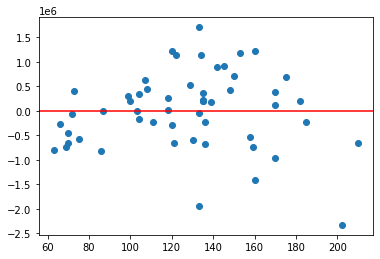

In [29]:
plt.scatter(df_cleaned['Living_area'], df_cleaned['e'])
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [32]:
#Ridge regularization
ridge_model2 = linear_model.Ridge(alpha=2)
ridge_model2.fit(x2, y2)
(ridge_model2.coef_,ridge_model2.intercept_)

(array([23597.10002388]), 1809909.5747406795)

In [33]:
#Lasso regularization
lasso_model2 = linear_model.Lasso(alpha=2)
lasso_model2.fit(x2, y2)
(lasso_model2.coef_,lasso_model2.intercept_)

(array([23597.79315962]), 1809821.418142722)

In [42]:
## question 2

In [175]:
from sklearn.datasets import load_iris

In [176]:
iris = load_iris()

In [177]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')

In [181]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [188]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [182]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [183]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

In [184]:
# Use the score method to get the accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.868421052631579


In [185]:
import numpy as np 
import seaborn as sns #seaborn is a package for nice-looking graphics
from sklearn import metrics

In [186]:
cm = metrics.confusion_matrix(y_test, predictions)

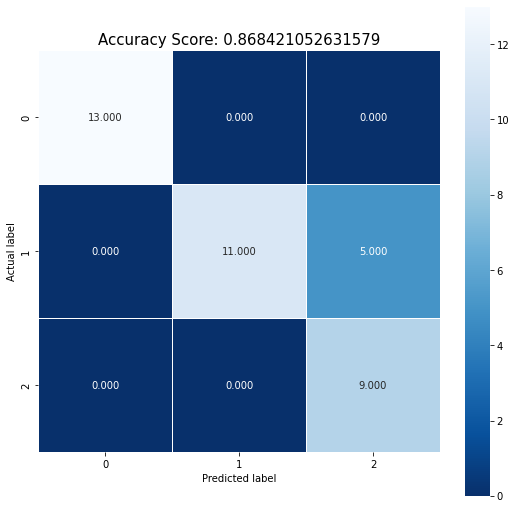

In [187]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('cm_iris.png')
#plt.show();



Evaluation of model:
* The logistic regression model obtained a classification accuracy of 0.868. Out of 13 setosas(class index 0), all were predicted correctly, and out of 9 virginicas(class index 2), all were predicted correctly. However, out of 16 versicolor(class index 1), only 11 were predicted correctly, while 5 were incorrectly predicted as virginicas.

This means that while our model is generally doing well, it is sometimes not able to correctly determine true class 1s as class 1s and predicts them as class 2s.

In [189]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

In [190]:
len(y_train)

112

In [191]:
# finding a suitable upper bound for value of k
count_per_class = [0,0,0]
for i in range(len(y_train)):
    count_per_class[y_train[i]] += 1
count_per_class

[37, 34, 41]

Count per class is done to observe how many instances of each class there is in the training dataset. This is to set an upper bound on our value of K. In the case of weights="uniform", how it decides which class a datapoint, x belongs to is it observes the K closest datapoints to x, and then check how many of the K datapoints belong to each class, and then the class that has the most number of datapoints that are close enough to K, regarless of distance. For example, given a datapoint x, if there are 3 classes, A,B,C. For k=10, if out of 10 closest datapoints, a.k.a "neighbours" of x, 4 belong to A, 3 belong to B and 3 belong to C, then x is predicted to belong to A. Thus in the event of an imbalanced dataset, for example there are 3 datapoints in class A, 100 datapoints in class B, 100 datapoints in class C, and k=7(slightly more than 3), then even if a given input x, where the 3 closest points to x belong to class A, and the next 4 closest belong to class B, then the predicted class is B. Thus, in the case of "uniform", it is important to set the max value of K to be lower than the count of the number of datapoints in the smallest class. In our case it is safe to put at 30.

In [195]:
for i in range(1, 51):
    
    # uniform
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    #Predict the response for test dataset
    y_pred = knn.predict(x_test)
    # Model Accuracy, how often is the classifier correct?
    print(f"Accuracy for k={i}, UNIFORM: {metrics.accuracy_score(y_test, y_pred)}")
    
    # weighted
    knn_weighted = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn_weighted.fit(x_train, y_train)
    #Predict the response for test dataset
    y_pred = knn_weighted.predict(x_test)
    # Model Accuracy, how often is the classifier correct?
    print(f"Accuracy for k={i}, WEIGHTED: {metrics.accuracy_score(y_test, y_pred)}")
    print()

Accuracy for k=1, UNIFORM: 0.9736842105263158
Accuracy for k=1, WEIGHTED: 0.9736842105263158

Accuracy for k=2, UNIFORM: 0.9736842105263158
Accuracy for k=2, WEIGHTED: 0.9736842105263158

Accuracy for k=3, UNIFORM: 0.9736842105263158
Accuracy for k=3, WEIGHTED: 0.9736842105263158

Accuracy for k=4, UNIFORM: 0.9736842105263158
Accuracy for k=4, WEIGHTED: 0.9736842105263158

Accuracy for k=5, UNIFORM: 0.9736842105263158
Accuracy for k=5, WEIGHTED: 0.9736842105263158

Accuracy for k=6, UNIFORM: 0.9736842105263158
Accuracy for k=6, WEIGHTED: 0.9736842105263158

Accuracy for k=7, UNIFORM: 0.9736842105263158
Accuracy for k=7, WEIGHTED: 0.9736842105263158

Accuracy for k=8, UNIFORM: 0.9736842105263158
Accuracy for k=8, WEIGHTED: 0.9736842105263158

Accuracy for k=9, UNIFORM: 0.9736842105263158
Accuracy for k=9, WEIGHTED: 0.9736842105263158

Accuracy for k=10, UNIFORM: 0.9736842105263158
Accuracy for k=10, WEIGHTED: 0.9736842105263158

Accuracy for k=11, UNIFORM: 0.9736842105263158
Accuracy fo

As explained earlier, weight="uniform" has the tendency to be affected heavily by the value of K as K increases. This can be observed by the cell above. For K values up to 23, there is no difference in the accuracy, however after that, the performance of the model starts to decrease for the uniform case. The reason for this is as mentioned previously, when the K value becomes higher, the inbalances in the dataset become more apparent and due to the indifference to distance of the datapoints to the input, classes with more datapoints will be favoured thus accounting for the inaccuracies. Whereas in the case of "distance" weights, the distance of each datapoint from the input will be factored in heavily when determining the class of the input, and thus even when the K value increases really high, the model will be weighted in the sense that it will pick the class that has points that are closest to the input distance wise.

We shall now consider the performance of several variations of the KNN models, k=10, weighted(should be the best version) and k=50, uniform(should be the worst version) and compare them to our logistic regression model.

In [223]:
# uniform
best_knn = KNeighborsClassifier(n_neighbors=10)
best_knn.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = best_knn.predict(x_test)
# Model Accuracy, how often is the classifier correct?
score = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy for k=10, WEIGHTED: {score}")

Accuracy for k=10, WEIGHTED: 0.9736842105263158


In [224]:
best_knn_cm = metrics.confusion_matrix(y_test, y_pred)

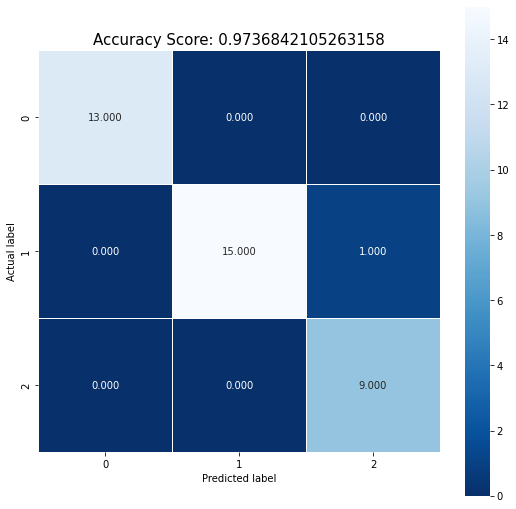

In [225]:
plt.figure(figsize=(9,9))
sns.heatmap(best_knn_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('best_knn_cm_iris.png')
#plt.show();

In [226]:
# weighted
worst_knn = KNeighborsClassifier(n_neighbors=50)
worst_knn.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = worst_knn.predict(x_test)
# Model Accuracy, how often is the classifier correct?
score = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy for k=50, UNIFORM: {score}")
print()

Accuracy for k=50, UNIFORM: 0.8947368421052632



In [227]:
worst_knn_cm = metrics.confusion_matrix(y_pred, predictions)

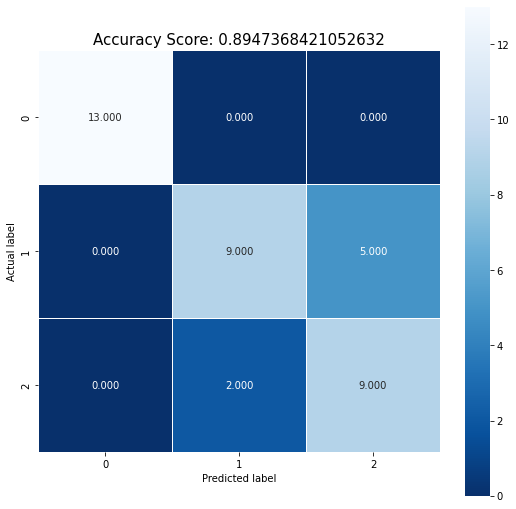

In [228]:
plt.figure(figsize=(9,9))
sns.heatmap(worst_knn_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('worst_knn_cm_iris.png')
#plt.show();

Comparing the performance of Logistic Regression, Best KNN and Worst KNN, we can see that both KNN models resulted in better accuracy on the test set than the Logistic Regression model. 

A possible explanation is that, seeing that this is a multi variable problem, and logistic regression models only support linear solutions, while KNN supports non linear solutions with non-linear boundaries, this classification problem might have a non linear solution and thus KNN will perform better even with a non ideal version.

Using the confusion matrix to compare the results of the Best KNN and the logistic regression model, it is clear that the KNN model only made 1 mistake classifying a true class 1 as a class 1, while the logistic regression model made 5. 

Additionally, observe that class 2 has significantly more datapoints than class 1, and when the KNN uses k=50 and a "uniform" weights, the model made more incorrect predictions towards class 2, thus showing the flaws of using too high of a K value and the optimal K value should be less than the count of the datapoints in each class.

Explain why it is important to use a separate test (and sometimes validation) set.

The differences between train, validation and test are as follows:
* **training set**: The sample of data used to fit the model.
* **validation set**: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
* **test set**: The completely unseen sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

Our objective of model training is to produce a model that has the ability to predict on unseen datapoints accurately, thus we have to find a way to evaluate the model's performance on its ability to generalise and not its ability to predict on the training dataset that it is being trained on. 

When the model trains, it learns by predicting on the training set and comparing its predictions with the labels and update its weights to minimise the error across the training set, thus given enough epochs, the model can optimise its weights to get 0 error across the training set when it completely "memorise" the dataset, and while that sounds good, the trade off is that it might not be able to generalise to other datapoints outside of the training set and that fails our initial objective of creating a model that can predict and generalise well.

As such, when we get a dataset, it is important to separate a small portion of data as the validation and test set that the model does not update its parameters on, so that while it is minimising its error across the training set, we are also constantly checking that it retains the ability to generalise and predict on the validation set per epoch during the training and finally at the end of the training, we can still evaluate the model's performance on the totally unseen test set.